In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
city = 'barranquilla'
date = '21ag'

In [91]:
time = pd.read_csv( './data/meta/time.csv' )

In [92]:
time[ 'date' ] = pd.to_datetime( time[ 'date' ], format = '%d/%m/%Y' )

In [93]:
time.dtypes

date    datetime64[ns]
time             int64
dtype: object

In [94]:
time.tail()

,date,time
163,2020-08-24,164
164,2020-08-25,165
165,2020-08-26,166
166,2020-08-27,167
167,2020-08-28,168


In [95]:
filename = ''
if city == 'bogota':
    filename = 'BOG'
elif city == 'barranquilla':
    filename = 'BQUILLA'
elif city == 'cali':
    filename = 'CALI'
elif city == 'medellin':
    filename = 'MED'
elif city == 'cartagena':
    filename = 'CARTA'
    
meta = pd.read_csv( './data/meta/{}{}.csv'.format( filename, date ) )

In [96]:
meta.shape

(1610, 12)

In [97]:
meta.dtypes

Unnamed: 0      int64
replicate       int64
time            int64
S             float64
E             float64
A             float64
I1            float64
I2            float64
I3            float64
R             float64
D             float64
obs             int64
dtype: object

In [98]:
meta.tail( 20 )

,Unnamed: 0,replicate,time,S,E,A,I1,I2,I3,R,D,obs
1590,1591,10,141,1.246527e+06,314.838505,2.042505,1645.787242,60.194914,17.357809,15177.434360,1639.350553,1689
1591,1592,10,142,1.246478e+06,302.703368,1.963954,1573.589515,57.453761,16.595016,15284.813494,1650.330616,1711
1592,1593,10,143,1.246432e+06,290.803394,1.886886,1504.739435,54.851615,15.866547,15387.485410,1660.822067,1648
1593,1594,10,144,1.246388e+06,279.185443,1.811614,1439.046574,52.379129,15.170701,15485.667441,1670.848245,1685
1594,1595,10,145,1.246345e+06,267.883118,1.738364,1376.337799,50.027949,14.505891,15579.564757,1680.431099,1630
1595,1596,10,146,1.246305e+06,256.919642,1.667290,1316.454661,47.790554,13.870636,15669.371461,1689.591317,1627
1596,1597,10,147,1.246266e+06,246.309946,1.598496,1259.251437,45.660141,13.263546,15755.271473,1698.348437,1680
1597,1598,10,148,1.246229e+06,236.062423,1.532037,1204.593453,43.630523,12.683312,15837.439309,1706.720937,1698
1598,1599,10,149,1.246194e+06,226.180394,1.467940,1152.355649,41.696044,12.128699,15916.040784,1714.726326,1748
1599,1600,10,150,1.246160e+06,216.663307,1.406202,1102.421369,39.851507,11.598541,15991.233630,1722.381212,1779


In [99]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

meta_grouped = meta.groupby( 'time' ).agg( { 'obs': [ 'mean', ci ] } ).reset_index().fillna( 0 )
meta_grouped.columns = [ '_'.join( col ).strip() for col in meta_grouped.columns.values ]
meta_grouped.rename( columns = { 'time_': 'time' }, inplace = True )

In [100]:
meta_grouped = meta_grouped.merge( time, how = 'left', on = 'time' )

In [101]:
meta_grouped = meta_grouped.loc[ meta_grouped[ 'date' ].notnull() ]

In [102]:
meta_grouped[ 'obs_lower' ] = meta_grouped[ 'obs_mean' ] - meta_grouped[ 'obs_ci' ]
meta_grouped[ 'obs_upper' ] = meta_grouped[ 'obs_mean' ] + meta_grouped[ 'obs_ci' ]

In [103]:
meta_grouped.head()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
1,1,0.0,0.000000,2020-03-14,0.000000,0.000000
2,2,0.0,0.000000,2020-03-15,0.000000,0.000000
3,3,0.0,0.000000,2020-03-16,0.000000,0.000000
4,4,0.0,0.000000,2020-03-17,0.000000,0.000000
5,5,0.2,0.371884,2020-03-18,-0.171884,0.571884


In [104]:
meta_grouped.tail()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
156,156,1737.8,21.500762,2020-08-16,1716.299238,1759.300762
157,157,1767.6,26.201322,2020-08-17,1741.398678,1793.801322
158,158,1749.8,18.550341,2020-08-18,1731.249659,1768.350341
159,159,1751.7,29.488785,2020-08-19,1722.211215,1781.188785
160,160,1781.9,22.367113,2020-08-20,1759.532887,1804.267113


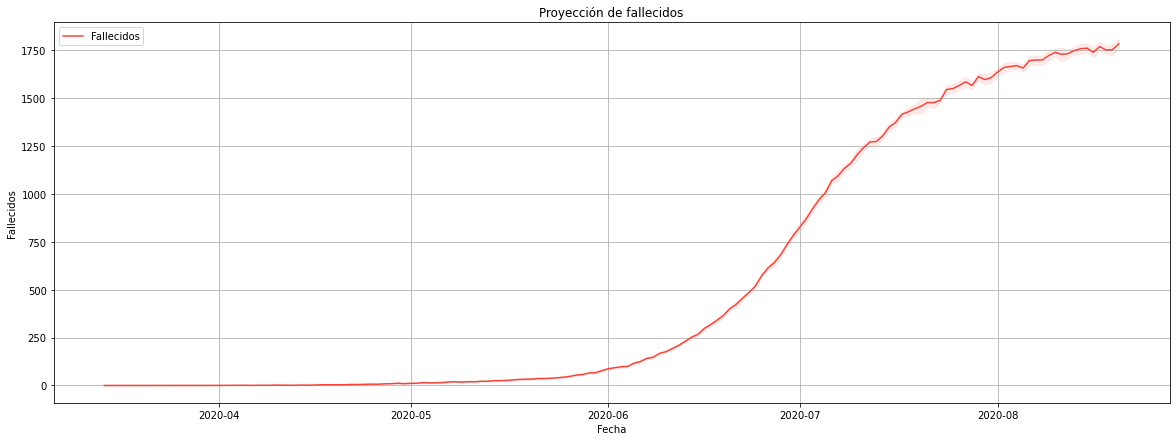

In [105]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( meta_grouped[ 'date' ], meta_grouped[ 'obs_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( meta_grouped[ 'date' ], meta_grouped[ 'obs_lower' ], meta_grouped[ 'obs_upper' ], color = '#f64438', alpha = .1 )

plt.title( 'Proyección de fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Fallecidos' )
plt.grid( True )
plt.legend()

In [106]:
deaths_by_city = pd.read_csv( './data/meta/deaths-by-city.csv' )[ [ 'date', city ] ].set_index( 'date' ).cumsum()

In [107]:
deaths_by_city.tail()

,barranquilla
date,
2020-08-13,1638.0
2020-08-14,1642.0
2020-08-15,1643.0
2020-08-16,1645.0
2020-08-17,1646.0


In [108]:
meta_grouped = meta_grouped.set_index( 'date' ).merge( deaths_by_city, how = 'outer', left_index = True, right_index = True ).reset_index()

In [109]:
meta_grouped.to_csv( './data/meta/seir_{}.csv'.format( city ), index = False )